## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

Now, for understanding cost function and its role, consider a linear regression model with an input vector $x^i = (X_1 , X_2 , \dots , X_n )$, and a real-valued output $y$. The linear regression model has the form:

$$\large f_\theta(X) = \theta_0 + \sum_{i=1}^mx^i\theta^i$$

Here:
- $[\theta_1, \theta_2, ... , \theta_n]$ are called **model weights** (generally) OR **coefficients** (in linear regression)
- $\theta_0$ is called **bias** (generally) OR **intercept** (in linear regression)

We consider a set of training data $(x_1 , y_1 ) \dots (x_m , y_m )$ from which to estimate the parameters $\theta$. Here m is the no of training examples we have. 

The regression model relies on several assumptions:

 - The independent variable is not random.
 - The variance of the error term is constant across observations. This is important for evaluating the goodness of the fit.
 - The errors are not autocorrelated. The Durbin-Watson statistic detects this; if it is close to 2, there is no autocorrelation.
 - The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.

If we confirm that the necessary assumptions of the regression model are satisfied, we can safely use the statistics reported to analyze the fit. 

Linear Regression Loss Function (Ordinary Least Squares)
-----

<center><img src="../images/loss.png" width="50%"/></center>

- The coefficient estimates for Ordinary Least Squares rely on the independence of the features. 
- When features are correlated and the columns of the design matrix \(X\) have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. 
- This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

## Some other loss function for Linear Regression

#### Absolute or Laplace or L1 loss:
$$J_\theta = \sum_{i=1}^m|e_i| = \sum_{i=1}^m|y_t - \theta_0 - \theta_1X_1 - \theta_2X_2|$$

#### Residual sum of squares or L2 loss:
$$J_\theta = \sum_{i=1}^me_i^2 = \sum_{i=1}^m(y_t - \theta_0 - \theta_1X_1 - \theta_2X_2)^2$$

#### Huber loss:

It is between L1 and L2 loss.

## Linear Models with Regularisation

- Regularization is the process of introducing additional information to minimize overfitting. 
- Regularization discourages unnecessary complexity.
- In regularisation, we try to shrink the regression coefficients by imposing a penalty on their size. 

#### One Way to Regularize: Add a constraint to the loss function

Regularized Loss = Loss Function + Constraint

Here constraint = $\large \sum_{j=1}^n |\theta_j|^p$ .

- Depending upon the value of the parameter $p$ in the constraint, we can have different types of regularisation like L1 (p=1) and L2 (p2). 

- This is more generally known as Lp regularizer.

- For making visualization easy, let us plot them in 2D space. For that we suppose that we just have two parameters.

<center><img src="../images/lp_reg.png" width="80%"/></center>

### Lasso (Least Absolute Shrinkage Selector Operator) Regression

In [ ]:
from sklearn.linear_model import Lasso

#### Linear Regression Loss Function + L1 Regularization

Here we see that the loss function is modified with an extra term called the penalty term. 

<center><img src="../images/l1.png" width="50%"/></center> 

$$ L1 = \large \lambda \sum_{j=1}^n|\theta_j| $$

Considering two independent variables, the penalty can be given as = $|\theta_1| + |\theta_2|$ .

Notice that the intercept $\theta_0$ has been left out of the penalty term. Penalization of the intercept would make the  procedure depend on the origin chosen for y.

- Here $\lambda$ is a **hyperparameter** and should be _set at the time of model training_. Higher the values of alpha, bigger is the penalty.
- L2 shrinks the weights using the absolute values of the weight coefficients (i.e., the weight vector).
- Penalize the model by the absolute weight coefficients.

<center><img src="../images/lasso.png" width="50%"/></center>

#### The effect of L1 loss
 - Penalize large coefficients - Large coefficients will increase the size of the total error functions.
 - L1 regularization induces sparsity. Sparsity means as many values will be zero as possible.

#### Why Lasso?
 - lasso selects only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.
 - It is generally used when we have more number of features, because it automatically does feature selection.

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

#### Linear Regression Loss Function + L2 Regularization

<center><img src="../images/l2.png" width="50%"/></center>

$$ \large L2 = \lambda \sum_{j=1}^n\theta_j^2$$

The ridge coefficients minimize a penalized residual sum of squares

- Here again $\lambda$ is a hyperparameter
- L2 shrinks the weights by computing the Euclidean norm of the weight coefficients (the weight vector )
- it is mostly used to prevent multicollinearity.

<center><img src="../images/ridge.png" width="50%"/></center> 

For both Lasso and Ridge: λ -> Regularization parameter
-----

λ parameter controls the regularization strength, aka the size of the shaded area.

The larger the value of the stronger the regularization of the model. 

### Elastic Net

Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both Ridge and Lasso by tuning the parameters. So it uses both L1 and L2 penality term

<center><img src="../images/elastic.png" width="75%"/></center>

### Before proceding further, move to Intorduction to Scikit learn

## Boston Housing Dataset

In [14]:
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np
import sklearn
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

# to see the shape of dataset
print(boston.data.shape)

(506, 13)


In [3]:
type(boston.data)

numpy.ndarray

In [6]:
# Now let’s convert it into pandas Dataframe
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
# convert the index to the column names
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [9]:
X, y = boston.data, boston.target

In [10]:
X.shape, y.shape

((506, 13), (506,))

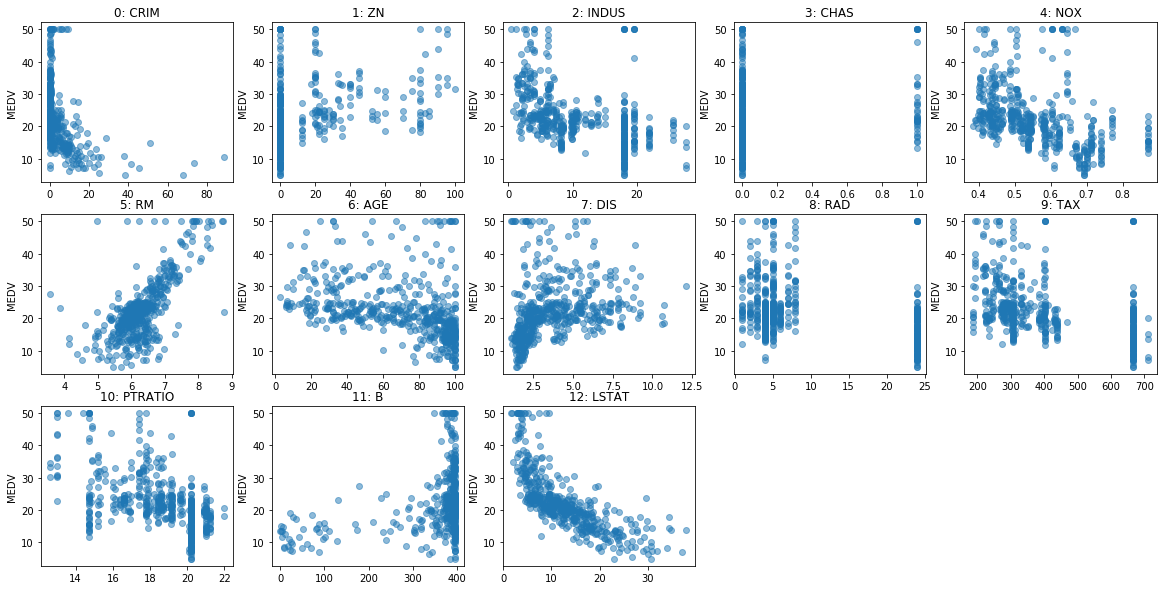

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

The linear regression reports 95% confidence intervals for the regression parameters, and we can visualize what this means using the seaborn library, which plots the regression line and highlights the 95% (by default) confidence interval for the regression line:

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}$')

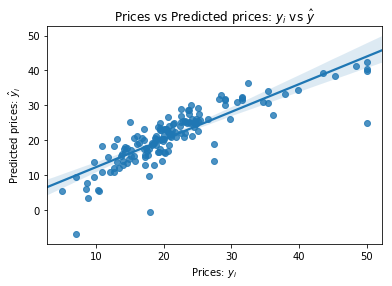

In [17]:
import seaborn as sns

ax = sns.regplot(y_test, y_pred);
ax.set_xlabel("Prices: $y_i$")
ax.set_ylabel("Predicted prices: $\hat{y}_i$")
ax.set_title("Prices vs Predicted prices: $y_i$ vs $\hat{y}$")

In [18]:
#calculating the error manually
np.sum((y_pred - y_test)**2)/y_test.shape[0]

21.517444231176903

In [19]:
#or you can import the Sklearn mse 
mse_ols = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse_ols)

21.517444231176903


### Lasso Regression

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}$')

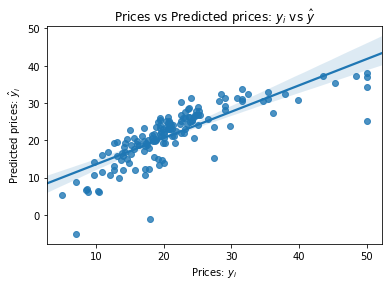

In [21]:
ax = sns.regplot(y_test, y_pred);
ax.set_xlabel("Prices: $y_i$")
ax.set_ylabel("Predicted prices: $\hat{y}_i$")
ax.set_title("Prices vs Predicted prices: $y_i$ vs $\hat{y}$")

In [22]:
mse_lasso = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse_lasso)

25.639502928044


### Ridge Regression

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}$')

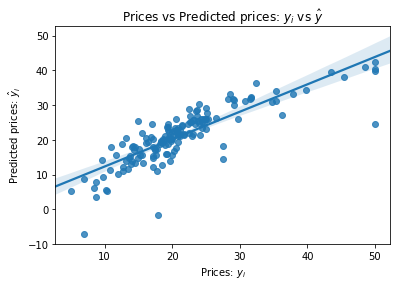

In [26]:
ax = sns.regplot(y_test, y_pred);
ax.set_xlabel("Prices: $y_i$")
ax.set_ylabel("Predicted prices: $\hat{y}_i$")
ax.set_title("Prices vs Predicted prices: $y_i$ vs $\hat{y}$")

In [27]:
mse_ridge = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse_ridge)

22.044053089861002


### Summary

In [28]:
mse_all = {'ols'    : mse_ols,
           'lasso'  : mse_lasso, 
           'ridge'  : mse_ridge}

for name, mse, in mse_all.items():
    print(f"{name:<7}: {mse:.4}")

ols    : 21.52
lasso  : 25.64
ridge  : 22.04


In [29]:
def reg_equation(coefs, names=None):
    "Create the regression equation with coefficents and names"
    if names is None:
        # Assign numbers to betas
        names = [f"X{_}" for _ in range(len(coefs))]
    equation = " \t+ \n".join("{:>6.3f}*{}".format(c, n.lower())
                                   for c, n in zip(coefs, names))
    return equation

In [30]:
print("OLS")
print(reg_equation(lm.coef_, names=boston.feature_names))
print()

print("Lasso")
lasso = Lasso()
lasso.fit(X_train, y_train)
print(reg_equation(lasso.coef_, names=boston.feature_names))
print()

print("Ridge")
ridge = Ridge()
ridge.fit(X_train, y_train)
print(reg_equation(ridge.coef_, names=boston.feature_names))
print()

OLS
-0.133*crim 	+ 
 0.036*zn 	+ 
 0.050*indus 	+ 
 3.120*chas 	+ 
-15.417*nox 	+ 
 4.057*rm 	+ 
-0.011*age 	+ 
-1.386*dis 	+ 
 0.243*rad 	+ 
-0.009*tax 	+ 
-0.911*ptratio 	+ 
 0.012*b 	+ 
-0.547*lstat

Lasso
-0.092*crim 	+ 
 0.035*zn 	+ 
-0.000*indus 	+ 
 0.000*chas 	+ 
-0.000*nox 	+ 
 1.281*rm 	+ 
 0.011*age 	+ 
-0.616*dis 	+ 
 0.192*rad 	+ 
-0.010*tax 	+ 
-0.703*ptratio 	+ 
 0.011*b 	+ 
-0.780*lstat

Ridge
-0.128*crim 	+ 
 0.037*zn 	+ 
 0.018*indus 	+ 
 2.933*chas 	+ 
-7.848*nox 	+ 
 4.064*rm 	+ 
-0.017*age 	+ 
-1.272*dis 	+ 
 0.225*rad 	+ 
-0.009*tax 	+ 
-0.827*ptratio 	+ 
 0.012*b 	+ 
-0.563*lstat



### Using GridSearchCV to optimize $\lambda$.

### For ridge regression

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])}


In [36]:
regr_ridge_opt = GridSearchCV(Ridge(), param_grid, cv=10, 
                              return_train_score=True)

In [37]:
regr_ridge_opt.fit(X_train, y_train)
print('param=', regr_ridge_opt.best_params_)

param= {'alpha': 0.001}


/anaconda3/envs/forall/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
ypred_ridge_opt = regr_ridge_opt.predict(X_test)

In [39]:
mse_ridge_opt = sklearn.metrics.mean_squared_error(y_test, ypred_ridge_opt)
print(mse_ridge_opt)

21.518120571402402


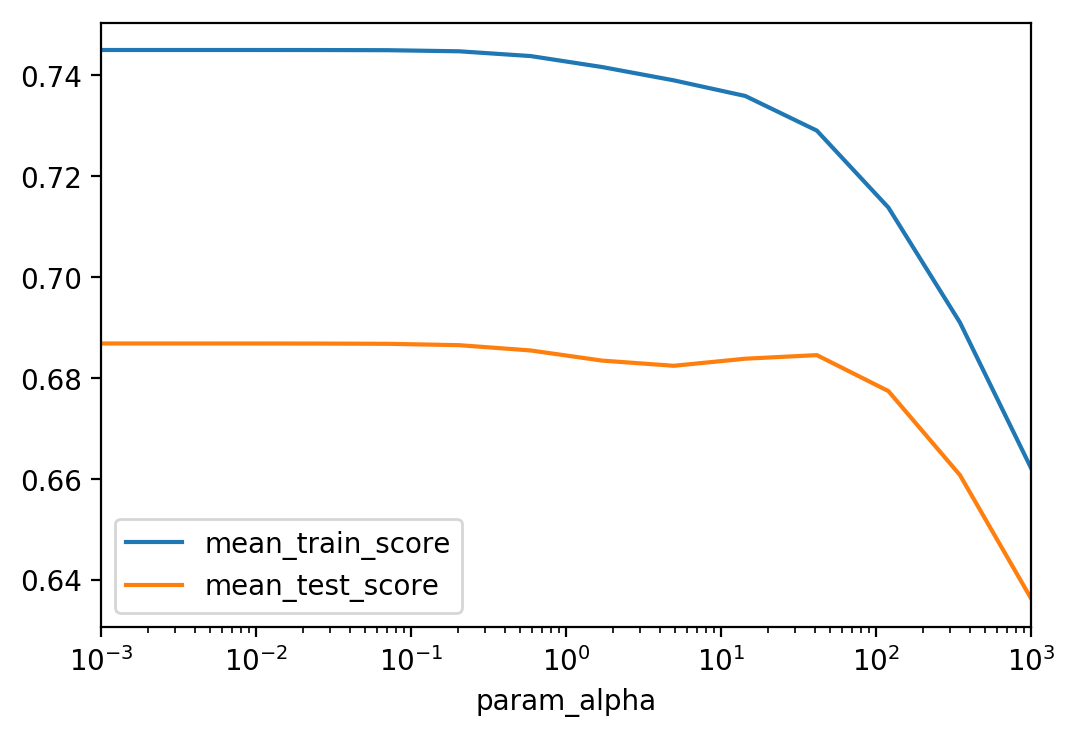

In [40]:
import pandas as pd
plt.figure(dpi=200)
results = pd.DataFrame(regr_ridge_opt.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")